<h3>1. Assignment Imports </h3>


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy.lib.recfunctions import append_fields
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as tck
import matplotlib.colors as col 
import matplotlib.cm as cm 
from matplotlib.widgets import Slider, Button, TextBox
from matplotlib import cbook
from matplotlib import rc
from matplotlib.patches import Patch
# Most imports are for decorations and interactivity
# imports for assignment MATPLOTLIB AND NUMPY LIBRARY
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Increase notebook size

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.__version__

'3.5.0'

'3.5.0' - Version of matplotlib used. (To have access to newer codes) e.g for interactive time series below

<h3>A. Resale flat prices</h3>

<h3>2. Data loading from 5 csv files (5 datasets)</h3> 

In [3]:
_1990to1999= np.genfromtxt('./resaleFlats1990-1999.csv', delimiter=',',encoding='ascii', dtype = None, names = True,missing_values=['na','-'])
_2017to2021 = np.genfromtxt('./2017Onwards.csv', delimiter=',',encoding='ascii', dtype = _1990to1999.dtype, names = True,missing_values=['na','-'])
_2015to2016= np.genfromtxt('./2015-01To2016-12.csv', delimiter=',',encoding='ascii', dtype = _1990to1999.dtype, names = True,missing_values=['na','-'])
_2012to2014 = np.genfromtxt('./2012-03To2014-12.csv', delimiter=',',encoding='ascii', dtype = _1990to1999.dtype, names = True,missing_values=['na','-'])
_2000to2012 = np.genfromtxt('./2000-2012.csv', delimiter=',',encoding='ascii', dtype = _1990to1999.dtype, names = True,missing_values=['na','-'])
# generate from csv file 1990 to 2021.

<h4>1.Before March 2012, data is based on date of approval for the resale transactions (HDB approval). For March 2012 onwards, the data is based on date of registration for the resale transactions (register from HDB to buy flats).

2.Similar data collection methods.</h4>

<h3>3. Concatenate data</h3>

In [4]:
_1990to2021 = np.concatenate([_1990to1999,_2000to2012,_2012to2014,_2015to2016,_2017to2021], axis = 0)
# concatenating multiple datasets using np.concatenate...

<h3>4. Cleansing of datasets (changing correct data type)</h3>

In [5]:
# changing datatype by appending new column with the datetime64[M]
_1990to2021 =np.lib.recfunctions.append_fields(_1990to2021, 'Month',np.array(_1990to2021['month']), dtypes="datetime64[M]").data

In [6]:
# dropping previous month column with wrong data type.
_1990to2021=np.lib.recfunctions.drop_fields(_1990to2021, 'month')

<h3>Changing cells to its full form for readability and clarity</h3>

In [7]:
# changing elements to its full form/ and making it easier to understand and removing duplicates
# Increased readability
def fullForm(element):
    if element == "MODEL A":
        return "Model A-Maisonette"
    elif element == "Model A":
        return "Model A-Maisonette"
    elif element == "MODEL A-MAISONETTE":
        return "Model A-Maisonette"
    elif element == "Model A Maisonette":
        return "Model A-Maisonette"
    elif element == "Model A2" :
        return "Model A(smaller)"
    elif element == "DBSS":
        return "DesignBuildFlats"
    elif element == "MAISONETTE":
        return "Maisonette"
    elif element == "IMPROVED-MAISONETTE":
        return "Improved-Maisonette"
    elif element == "STANDARD":
        return "Standard"
    elif element == "APARTMENT":
        return "Apartment"
    elif element == "MULTI GENERATION":
        return "Multi Generation"
    elif element == "PREMIUM APARTMENT":
        return "Premium Apartment"
    elif element == "IMPROVED":
        return "Improved"
    elif element == "NEW GENERATION":
        return "New Generation"
    elif element == "TERRACE":
        return "Terrace"
    elif element == "SIMPLIFIED":
        return "Simplified"
    elif element == "2-ROOM":
        return "2-room"
    elif element == "MULTI-GENERATION":
        return "Multi Generation"
    else:
        return element
# Modifying columns using map.
_1990to2021["flat_model"] = np.array(list(map(fullForm,_1990to2021["flat_model"])))
_1990to2021['Flat_type'] = np.array(list(map(fullForm, _1990to2021["Flat_type"])))
np.unique(_1990to2021['flat_model'])

array(['2-room', 'Adjoined flat', 'Apartment', 'DesignBuildFlats',
       'Improved', 'Improved-Maisonette', 'Maisonette',
       'Model A(smaller)', 'Model A-Maisonette', 'Multi Generation',
       'New Generation', 'Premium Apartment', 'Premium Apartment L',
       'Premium Maisonette', 'Simplified', 'Standard', 'Terrace',
       'Type S1', 'Type S2'], dtype='<U19')

<h3>5. Setting fonts</h3>

In [8]:
font = {'family' : 'sans','weight' : 'normal'}  
plt.rc('font', **font)

<h3>6. General dataset info/HDB info</h3>

In [9]:
col_count = len(_1990to2021[:][0])
row_count = len(_1990to2021[:])
typeOfdata =_1990to2021.dtype
print("Title: Resale flat prices based on registration date from 1990 to 2021")
print()
print(f"In this array (combined datasets), there are {row_count} rows and {col_count} columns.")
print("Below is the respective column names and its corresponding data type.\n")
for v,i in enumerate(_1990to2021.dtype.names):
    if 'int' in str(typeOfdata[v]) or 'float' in str(typeOfdata[v]):
        print(str(v+1)+".",i,"\t - ",typeOfdata[v], '(numeric)')
    else:
        print(str(v+1)+".",i,"\t - ",typeOfdata[v])
    
print("The main types of data are Text (Not numerical), Datetime (YYYY-MM), and numeric (floats, ints)")

Title: Resale flat prices based on registration date from 1990 to 2021

In this array (combined datasets), there are 861287 rows and 10 columns.
Below is the respective column names and its corresponding data type.

1. Town 	 -  <U15
2. Flat_type 	 -  <U16
3. Block 	 -  <U4
4. Street_name 	 -  <U22
5. storey_range 	 -  <U8
6. Floor_area 	 -  float64 (numeric)
7. flat_model 	 -  <U19
8. lease_commence_date 	 -  int32 (numeric)
9. Resale_price 	 -  int32 (numeric)
10. Month 	 -  datetime64[M]
The main types of data are Text (Not numerical), Datetime (YYYY-MM), and numeric (floats, ints)


In [10]:
np.unique(_1990to2021['storey_range'])

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype='<U8')

<h2>95% Confidence Interval for each town (all years)</h2>

<h4><i>Confidence interval refers to a range of values that the true population mean (parameter) is in.<i> Since confidence intervals will be affected by outliers, the median for each town is also calculated so that we can compare the CI and median. As such we can determine a more accurate measure of center</h4>

We can then observe and compare the median and confidence interval for each town

In [49]:
# Function to calculate statistic based on a category/column
def stats(statistic, arr, column):
    statList =[]
    for s in np.unique(arr[column]):
        statList.append(statistic(arr[arr[column] == s]['Resale_price']))
    return np.array(statList)

sampleMean = stats(np.mean, _1990to2021, 'Town')
sampleStd = stats(np.std, _1990to2021, 'Town')
count = [len(_1990to2021[_1990to2021['Town'] == y]) for y in np.unique(_1990to2021['Town'])]


# Margin of error
MOE = 1.96 * (sampleStd/np.sqrt(count))
upper = sampleMean + MOE
lower = sampleMean - MOE
indexs = np.argsort(lower)

# Mean resale price
median = stats(np.median, _1990to2021, 'Town')

# FUNCTION TO SORT AND REVERSE ARRAY
def fnc(arr):
    return arr[indexs][::-1]


print('95% Confidence intervals');print();
# For loop to print confidence intervals for all towns and the median for the towns as well for all years.
for k,f,b,l in zip(fnc(upper),np.sort(lower)[::-1], fnc(np.unique(_1990to2021['Town'])), fnc(median)):
    print(f' {b} -- 95% CI for all flats is between ${f/1000:.1f}K and ${k/1000:.1f}K\t',"\tMedian: $", l)

 

95% Confidence intervals

 PUNGGOL -- 95% CI for all flats is between $451.5K and $454.3K	 	Median: $ 450000.0
 BUKIT TIMAH -- 95% CI for all flats is between $425.3K and $442.4K	 	Median: $ 405000.0
 SENGKANG -- 95% CI for all flats is between $411.6K and $414.2K	 	Median: $ 416000.0
 BISHAN -- 95% CI for all flats is between $403.7K and $408.7K	 	Median: $ 387000.0
 PASIR RIS -- 95% CI for all flats is between $391.5K and $394.1K	 	Median: $ 380000.0
 SEMBAWANG -- 95% CI for all flats is between $354.6K and $357.9K	 	Median: $ 358000.0
 CHOA CHU KANG -- 95% CI for all flats is between $329.6K and $331.8K	 	Median: $ 325000.0
 BUKIT MERAH -- 95% CI for all flats is between $327.8K and $332.6K	 	Median: $ 284000.0
 MARINE PARADE -- 95% CI for all flats is between $323.5K and $331.6K	 	Median: $ 293000.0
 TAMPINES -- 95% CI for all flats is between $320.8K and $322.7K	 	Median: $ 308000.0
 BUKIT PANJANG -- 95% CI for all flats is between $314.9K and $318.1K	 	Median: $ 300000.0
 SERANGO

<p>Overall, punggol town generally has the most expensive HDB flats, having a median of SGD450,000 and confidence interval of SGD451,500 to SGD454,300. On the other hand, we can see that Lim Chu Kang generally have the cheapest HDB flats, having a median resale price of SGD61,750 and a confidence interval between SGD55700 to SGD71600.</p>

<h3>95% Confidence interval for average resale price of SG HDB flats</h3>

In the context of this dataset, we can give give a range of values that define the mean of resale price of SG HDB flats

In [12]:
totalmean = np.mean(_1990to2021['Resale_price'])
totalstd = np.std(_1990to2021['Resale_price'])
length = len(_1990to2021['Resale_price'])
totalMOE = 1.96 * (totalstd/np.sqrt(length))
totalUpper = totalmean +totalMOE
totalLower = totalmean -totalMOE

totalmedian = np.median(_1990to2021['Resale_price'])
print(f"I am 95% confident that the average resale price of HDB flats in singapore is between ${totalLower:.1f} and ${totalUpper:.1f}, and a median of ${totalmedian}")


I am 95% confident that the average resale price of HDB flats in singapore is between $301687.1 and $302341.4, and a median of $281800.0


<h3>Dataset info</h3>

In [13]:
_1990to2021

array([('ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '10 TO 12',  31., 'Improved', 1977,   9000, '1990-01'),
       ('ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '04 TO 06',  31., 'Improved', 1977,   6000, '1990-01'),
       ('ANG MO KIO', '1 ROOM', '309', 'ANG MO KIO AVE 1', '10 TO 12',  31., 'Improved', 1977,   8000, '1990-01'),
       ...,
       ('YISHUN', 'Multi Generation', '633', 'YISHUN ST 61', '10 TO 12', 171., 'Multi Generation', 1987, 860000, '2021-03'),
       ('YISHUN', 'Multi Generation', '632', 'YISHUN ST 61', '01 TO 03', 164., 'Multi Generation', 1987, 760000, '2021-10'),
       ('YISHUN', 'Multi Generation', '633', 'YISHUN ST 61', '07 TO 09', 171., 'Multi Generation', 1987, 865000, '2021-12')],
      dtype=[('Town', '<U15'), ('Flat_type', '<U16'), ('Block', '<U4'), ('Street_name', '<U22'), ('storey_range', '<U8'), ('Floor_area', '<f8'), ('flat_model', '<U19'), ('lease_commence_date', '<i4'), ('Resale_price', '<i4'), ('Month', '<M8[M]')])

<h3>7. Graphs</h3>

<b>Click on left bar graph for interactivity!</b>

<IPython.core.display.Javascript object>


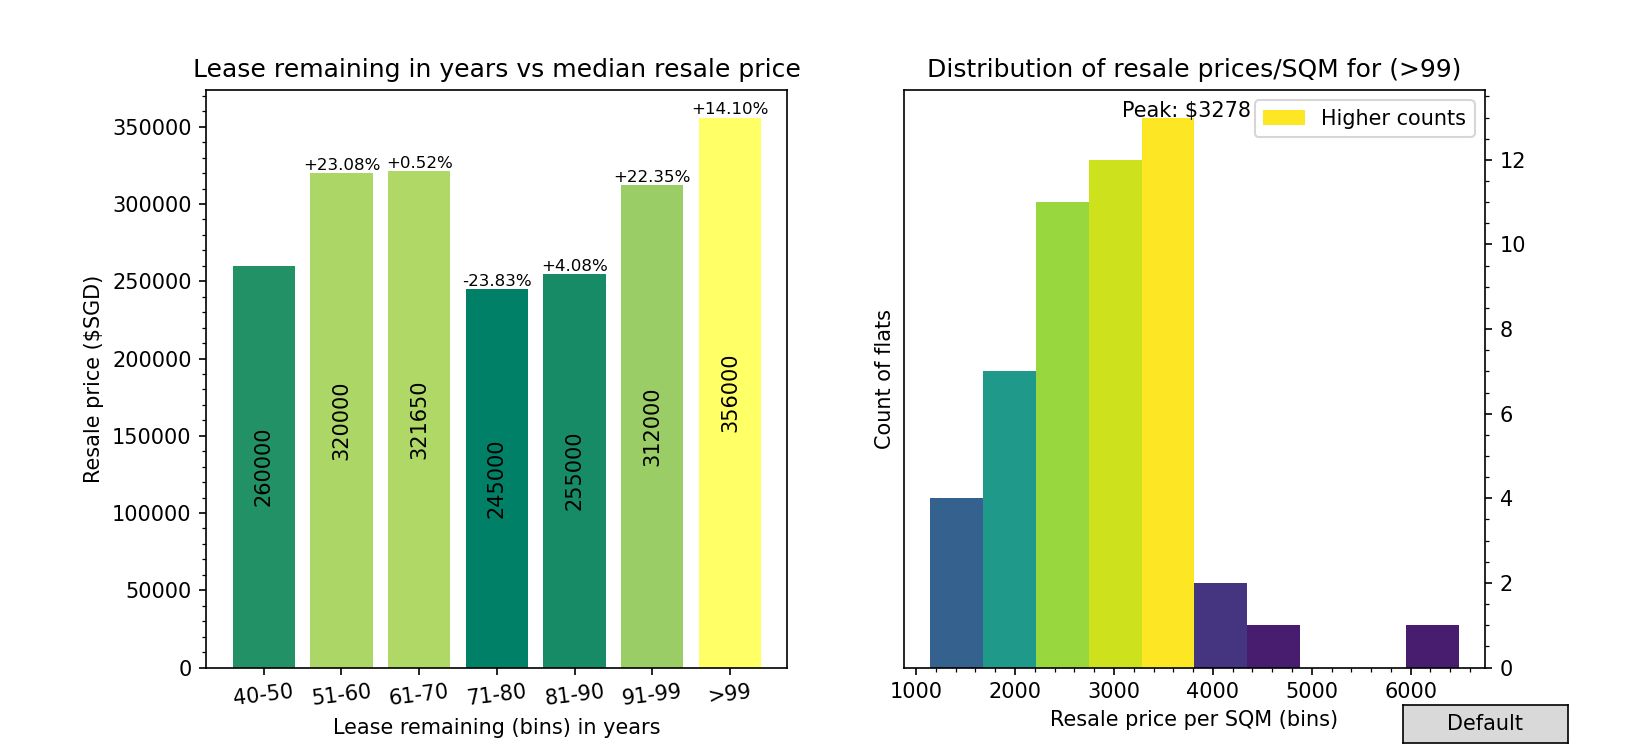

In [33]:
figx, (axes1,axes) = plt.subplots(1,2, figsize=(11,5))
# PLOT remaining lease bar GRAPH

# Changing the month column data to an integer format (year format)
yearFormat =_1990to2021['Month'].astype('datetime64[Y]').astype(int) + 1970
leaseLeft = 99 - (yearFormat - _1990to2021['lease_commence_date'])

# function to assign bins for bar graph
def assign_bins(second):
    if (second <= 50):
        return "40-50"
    elif second <= 60:
        return "51-60"
    elif second <= 70:
        return "61-70"
    elif second <= 80:
        return "71-80"
    elif second <= 90:
        return "81-90"
    elif second <=99:
        return "91-99"
    elif second > 99:
        return ">99"

# Assign bins for graph change interval in tens.
newBins = np.vectorize(assign_bins)(leaseLeft.data)
temp =  np.lib.recfunctions.append_fields(_1990to2021, 'lease_remain', np.array(newBins)).data
leaseArr =np.array([np.median(temp[temp['lease_remain'] == i ]['Resale_price']) for i in np.unique(temp['lease_remain'])])

# Setting more titles and ticks for bar graph
axes1.set_title('Lease remaining in years vs median resale price')
axes1.set_xlabel('Lease remaining (bins) in years')
axes1.set_ylabel('Resale price ($SGD)')
axes1.yaxis.set_minor_locator(tck.AutoMinorLocator())

# Add color to bar graph
cmapz = cm.ScalarMappable(col.Normalize(min(leaseArr),max(leaseArr)), "summer" )
tempbins = np.unique(temp['lease_remain'])
bars =axes1.bar(tempbins,leaseArr, color = cmapz.to_rgba(leaseArr) , picker = True)

# Add percentage labels for the graphs relative to previous bar
axes1.bar_label(bars, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(leaseArr[:-1], leaseArr[1:])], fontsize = 8, padding = 0)
axes1.bar_label(bars, label_type='center', rotation=90)
axes1.tick_params(labelrotation = 7, axis = 'x')

# PLOT histogram
def defaultplot(event):
    global pricePerSQM
    axes.clear()
    # Based on freedman-diaconis rule //select bin no.
    # https://en.wikipedia.org/wiki/Freedman%E2%80%
    pricePerSQM =_1990to2021['Resale_price']/_1990to2021['Floor_area']
    q25, q75 = np.percentile(pricePerSQM, [25, 75])
    bin_width = 2 * (q75 - q25) * len(pricePerSQM) ** (-1/3)
    bins = round((np.max(pricePerSQM) - np.min(pricePerSQM)) / bin_width)
    
    # Plotting the histogram
    y, x, o =axes.hist(pricePerSQM,bins = bins)
#     Labels and legend
    maxX = np.argmax(y)
    axes.text(x[maxX]-200,y[maxX] , "Peak: $" +str(int(x[maxX])))
    # Set manual legend
    manualLegend = [Patch(facecolor='#FDE725FF',
                         label='Higher counts')]
    axes.legend(handles=manualLegend, loc='upper right')

    # Selecting from color maps (color: viridis)
    cmap = cm.viridis
    for i, (cnt, value, bar) in enumerate(zip(y, x, o)):
        bar.set_facecolor(cmap(cnt/y.max()))
#         Setting title/labels and ticks
    axes.set_title("Distribution of resale prices/SQM (all)")
    axes.set_xlabel("Resale price per SQM (bins)")
    axes.set_ylabel("Count of flats")
    axes.minorticks_on()
    axes.yaxis.tick_right()
    
    
# Plot histogram
defaultplot(None)


#     Click bar graph for interactivity.
def interact(event):
    global pricePerSQM
    bar = event.artist 
    axes.clear()
    index = (bar.get_x()*2 + bar.get_width())/2
    filter_by = tempbins[int(index)]
    
    y,x,o = axes.hist(pricePerSQM[temp['lease_remain'] == filter_by])
    axes.set_title(f"Distribution of resale prices/SQM for ({filter_by})")
    axes.set_xlabel("Resale price per SQM (bins)")
    axes.set_ylabel("Count of flats")
    axes.minorticks_on() 
    cmap = cm.viridis
    for i, (cnt, value, bar) in enumerate(zip(y, x, o)):
        bar.set_facecolor(cmap(cnt/y.max()))
    maxX = np.argmax(y)
    axes.text(x[maxX]-200,y[maxX] , "Peak: $" +str(int(x[maxX])))
    manualLegend = [Patch(facecolor='#FDE725FF',
                         label='Higher counts')]
    axes.legend(handles=manualLegend, loc='upper right')
    figx.canvas.draw()
    axes.yaxis.tick_right()
    
    

# Button location
default = plt.axes([0.85, 0.01, 0.1, 0.05])
default2 = Button(default, 'Default')
default2.on_clicked(defaultplot)

figx.canvas.mpl_connect('pick_event' , interact)
plt.show()

SQM stands for square metres, Line indicates mean resale price/SQM

Anomalies

In [15]:
inyear=_1990to2021['Month'].astype('datetime64[Y]').astype(int) +1970
print(f"Resale year - lease commence year: {np.unique(inyear- _1990to2021['lease_commence_date'])}")
#lease left in years
print(f"Unique lease remaining in years: {np.unique(leaseLeft)}")

Resale year - lease commence year: [-2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55]
Unique lease remaining in years: [ 44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101]


The distribution of resale price per SQM is right skewed, with the peak being around $ 2000-2500 per SQM, around 15000 house. On the right, we can also see that as lease years remaining increases, the resale price generally increases. However, 71-80 and 81-90 are outliers, this may be due to other more significant factors influencing the price instead. e.g distance from cbd, location. We can notice that there are houses more than 99 lease years. This is very unusual as normal HDB flats would be below 99 years of lease. This may be due to data error in collecting resale date/lease commencement date. Without accounting for this, we can see an increase of resale price of around 20 percent from 40-50 to 91-99.

<h3>Drag slider for interactivity</h3>

<IPython.core.display.Javascript object>


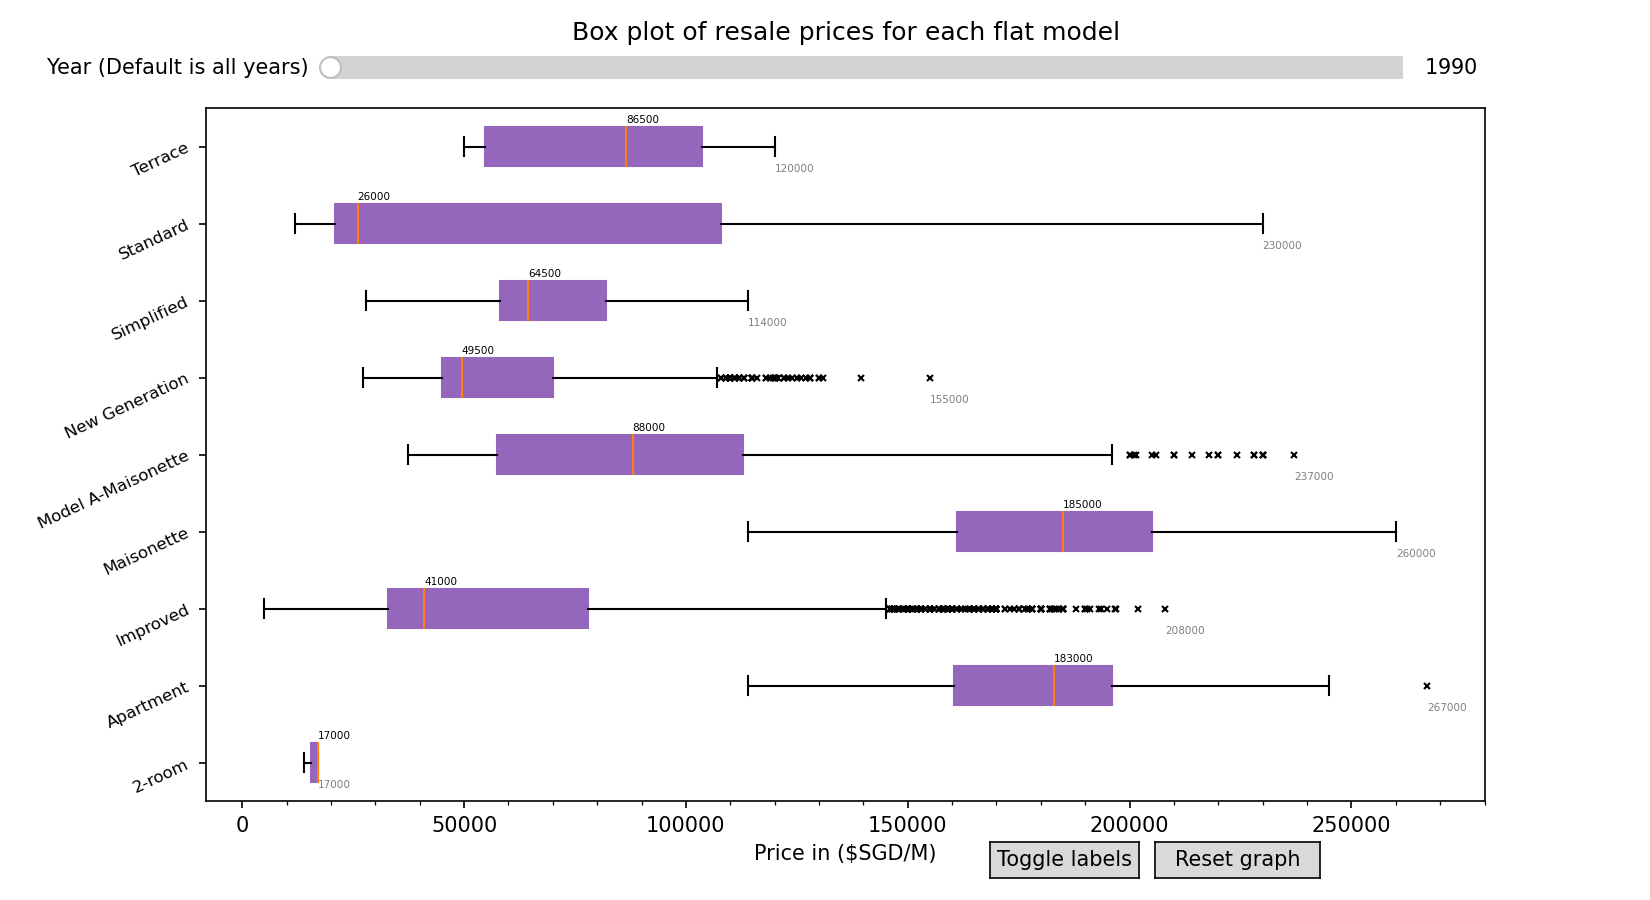

You can control the slider to see for each year. Maximum values and median for each flat model is labelled


In [53]:
fig,axs = plt.subplots(figsize = (11,6))



labels = True

# Function to get the unique models and the median prices for each model
def values(column,resaleprice, array, dtype):
    unique = np.unique(array[column])
    f = np.array([np.array(array[resaleprice][array[column] ==i]) for i in unique], dtype = dtype)
    return unique,f

# Change to int year
def getYears(arr):
    return np.unique(arr.astype('datetime64[Y]').astype(int)) +1970

# Years for slider

years = getYears(_1990to2021['Month'])

# prices for each of model
models,prices = values("flat_model", "Resale_price", _1990to2021, 'O')

# axes for the slider (position)
sliderax = plt.axes([0.2, 0.9, 0.65, 0.05])

# Decorate the outliers
flierprops = dict(marker='x', markersize=3)

# give a label to the median
def medianData(prices, info):    
    for o,i in enumerate(prices):
#         cbook.boxplot_stats display statistics for the boxplot
        datas = cbook.boxplot_stats(i)
        for v in datas:
            axs.text(v[info],o+1.3,str(int(v[info])),fontsize=5)
medianData(prices, 'med')

# Give a label to the maximum boxplot value
textlabels = []
def maximum(prices):
    if(labels):
        for p,d in enumerate(prices):
            max_value =np.max(d)
            textlabels.append(axs.text(max_value, p+0.67, str(int(max_value)), fontsize = 5, c='tab:gray'))
    
        

def maximum_event():
    global textlabels
    global labels
    global fig
    for i in range(len(textlabels)):
        textlabels[i].set(visible = labels)
    fig.canvas.draw()
            
maximum(prices)

def label_handler(event):
    global labels
    labels = not labels
    maximum_event()
    

        
# Plot box plot horizontally, and give it colors

bxplt = axs.boxplot(prices, labels = models , vert = False,patch_artist = True, flierprops = flierprops)
axs.set_yticklabels(models, rotation=25, ha='right')


plt.setp(bxplt['boxes'], color = 'tab:purple')

# When slider is moved, plot the graph again with corresponding year.
def event(year):
    axs.clear()
# Switch data type to year format to find rows matching int(year)
    data = _1990to2021[_1990to2021['Month'].astype('datetime64[Y]').astype(int) + 1970 == int(year)]
    models,prices = values("flat_model", "Resale_price", data, "O")
    maximum(prices)
    medianData(prices, 'med')
    boxp = axs.boxplot(prices, labels = models , vert = False, patch_artist = True, flierprops = flierprops)
    axs.set_yticklabels(models, rotation=25, ha='right')
    plt.setp(boxp['boxes'], color = 'tab:purple')
    axs.set_xlabel('Price in ($SGD/M)')
    axs.set_title("Box plot of resale prices for each flat model", y =1.08)
    axs.xaxis.get_ticklocs(minor=True)
    axs.minorticks_on()
    axs.yaxis.set_tick_params(which='minor', bottom=False)
    axs.tick_params(axis = "y" , labelsize= 8)

axs.set_title("Box plot of resale prices for each flat model", y =1.08)
    
# Set slider
slider = Slider(sliderax, label  = "Year (Default is all years)", valmin = np.min(years), valmax = np.max(years), valstep = 1)

# changes when scrolled.
slider.on_changed(event)


# Tick deco/setting
axs.tick_params(axis = "y" , labelsize= 8)
axs.xaxis.get_ticklocs(minor=True)
axs.minorticks_on()
axs.yaxis.set_tick_params(which='minor', bottom=False)
axs.set_xlabel('Price in ($SGD/M)')



# reset slider axes
resetaxes = plt.axes([0.7, 0.025, 0.1, 0.04])

# Button location axes
secondaxes = plt.axes([0.6, 0.025, 0.09, 0.04]) 
# Button deco
button = Button(resetaxes, 'Reset graph', hovercolor='0.9')
button2 = Button(secondaxes, 'Toggle labels', hovercolor='0.9')


    


# reset button to reset back to beginning.
def reset(event):
    slider.reset()
button.on_clicked(reset)

# Button to toggle max values
button2.on_clicked(label_handler)
print('You can control the slider to see for each year. Maximum values and median for each flat model is labelled')


plt.show() 

Overall, we can see that Type S1 and type S2 has the highest resale price overall, with a median of SGD911000, and SGD1030000 respectively. Upon research they are apartments at The Pinnacle@Duxton, and in view of their historical significance and award-winning design, they are more expensive than other types of flats. 2 room flats on the other hand have the least median of SGD150500. We also can see that the resale prices of adjoined flats and terraces have the highest variability, given its larger box length. while Premium apartment L resale prices has the smallest variability. We can see that there are a many outliers for most of the flats.

Types s1 and s2 resale transactions only existed 2014 and onwards. 

<h3>Click on time series line and textbox for interactivity</h3>

<IPython.core.display.Javascript object>


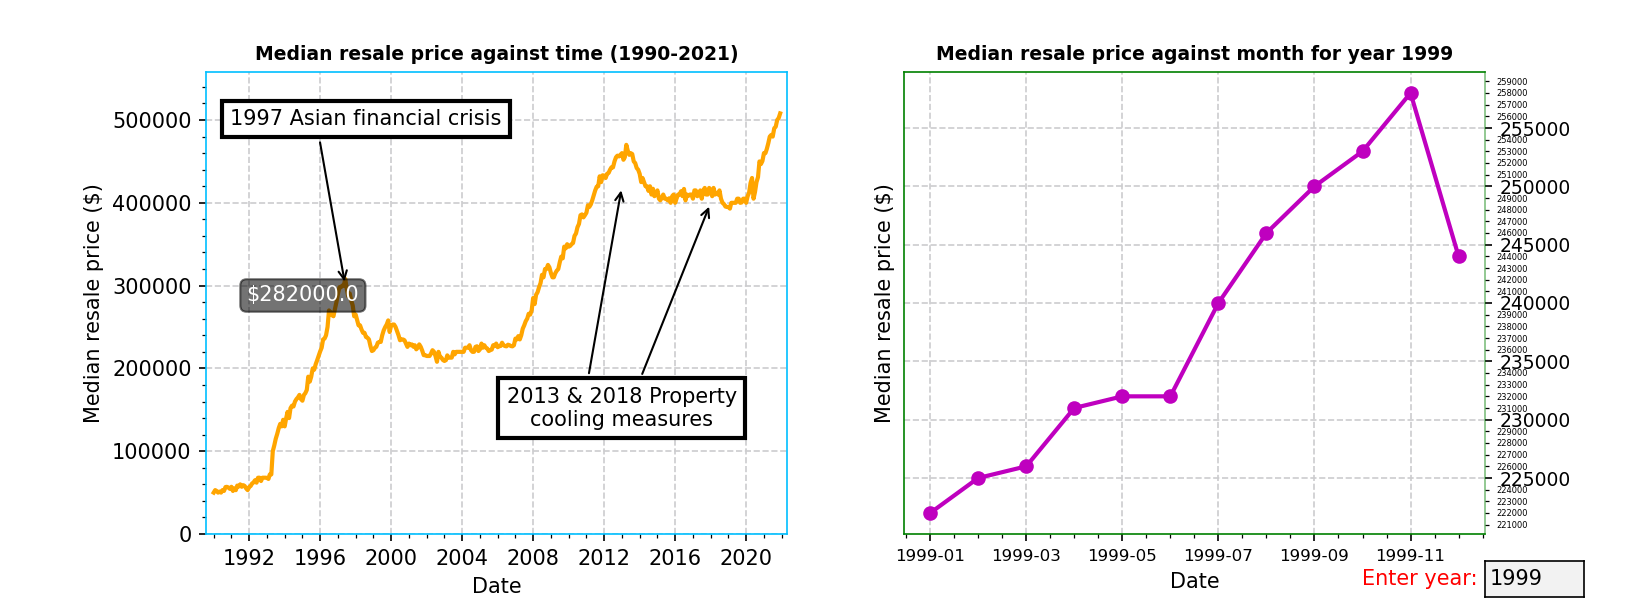

Would you like to see the resale price of houses(1990 to 2021) by 1)months or 2)year? 1
Click line to show price information



In [17]:
# PLEASE INPUT FOR GRAPH

fig, (ax,ax2) = plt.subplots(1,2, figsize=(11,4))

# User input with validation
while True:
    try:
        dateGranularity = int(input('Would you like to see the resale price of houses(1990 to 2021) by 1)months or 2)year? '))
        if dateGranularity == 1:
            dateGranularity = "M"
        elif dateGranularity == 2:
            dateGranularity = "Y"
        else:
            print("wrong number")
        break;
    except ValueError:
        print("Wrong input")
    except:
        print("Invalid")
        
        
        
userYear = 1990

unique_dates = np.unique(_1990to2021['Month'])
def getMedianByMonth(array, granularity, resaleprice,year):
    medianList = []
#     To find rows with dates in year format matching "year"
    for i in unique_dates[unique_dates.astype('datetime64[Y]').astype(int) + granularity == year]:
        medianList.append(np.median(array[np.where(array['Month'].astype('datetime64[M]') ==i)][resaleprice]))
    return np.array(medianList)



monthMedian=getMedianByMonth(_1990to2021,1970,"Resale_price", userYear)

# median is used due to outliers



def getMedianByYearOrMonth(array,yearOrMonth, resalePrice):
    medianList =[]
    for i in np.unique(array['Month'].astype(yearOrMonth)):
        medianList.append(np.median(array[array['Month'].astype(yearOrMonth) == np.array(i, dtype = yearOrMonth)][resalePrice]))
    return np.array(medianList)
# median is used due to outliers
    

    
dataType = 'datetime64' + '[' + dateGranularity + ']'
medianList = getMedianByYearOrMonth(_1990to2021, dataType, "Resale_price")




# Axis labels for left graph 
ax.set_xlabel('Date')
ax.set_ylabel('Median resale price ($)')

# Axis labels for right graph
ax2.set_xlabel('Date')
ax2.set_ylabel('Median resale price ($)')





YTicks = np.arange(0,560000,20000)

# Setting y ticks
ax.set_yticks(YTicks, minor=True)
ax.set_xticks(np.arange(len(np.unique(_1990to2021['Month'].astype(dataType)))), minor = True)



# Minor ticks and labels sizes
ax.minorticks_on()
ax2.minorticks_on()
ax2.tick_params(axis='x', which='major', labelsize=8)



# Title for graphs
ax.set_title('Median resale price against time (1990-2021)', size=9, fontweight ='bold')
ax2.set_title('Median resale price against month for year ' + str(userYear), size =9, fontweight ='bold')

# X and Y axis Limits for left graph
ax.set_ylim(np.min(medianList) -50000,np.max(medianList) +50000)
ax.set_xlim(_1990to2021['Month'][0].astype(dataType) -5,_1990to2021['Month'][-1].astype(dataType) +5)








# Annotation for significant events.
ax.annotate('1997 Asian financial crisis', xy=(np.array('1997-06', dtype =dataType),300000), xycoords='data', 
    bbox=dict(fc="w", ec="k", lw=2), xytext=(10,80), textcoords='offset points', va= 'center',
     arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=100,rad=10", facecolor='black'),horizontalalignment = 'center')


ax.annotate('2013 & 2018 Property\ncooling measures', xy=(np.array('2013-01',dtype = dataType),420000), xycoords='data', 
    bbox=dict(fc="w", ec="k", lw=2), xytext=(0,-115), textcoords='offset points', horizontalalignment = 'center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=10"))  


ax.annotate("", xy=(np.array('2018-01', dtype =dataType), 400000),xycoords = 'data',textcoords='offset pixels',xytext=(-70,-175),
            arrowprops=dict(arrowstyle="->"))



    
# Grids for graphs
ax.grid(which='major', color='#CCCCCE', linestyle='--')
ax2.grid(which='major', color='#CCCCCE', linestyle='--')

# modify ticks
ax.tick_params(axis="both", which="both", top=False,    
                labelbottom=True, right=False, labelleft=True)
ax2.yaxis.set_minor_formatter(ScalarFormatter())
    
ax2.tick_params(axis ='y', which ='minor', 
               labelsize = 4, colors ='k') 
ax2.tick_params(axis ='y', which ='major', 
               labelsize = 9, colors ='k') 

ax2.yaxis.tick_right()


# To beautify the spines
plt.setp(tuple(ax.spines.values()), color = '#00BFFF')
plt.gca().spines["right"].set_alpha(.5)
for spine in ax2.spines.values():
    spine.set_edgecolor('green')
    

# To extract out months for that specific year user entered
uniqueMonths = unique_dates[unique_dates.astype('datetime64[Y]').astype(int) + 1970 == userYear]


# Plotting line graphs
ticks = np.arange(len(uniqueMonths))
ax2.set_xticks(ticks[::2] , labels= uniqueMonths[::2])
ax2.plot(ticks ,monthMedian,'-mo', linewidth  = '2', label = 'Year:' + str(userYear) , picker = True)

ax.plot(np.unique(_1990to2021['Month'].astype(dataType)),medianList, color = "orange", linewidth ='2', picker = True)


# Text to display resale price

text = ax.text(ax.get_xlim()[0],0, "", ha = "right",bbox = dict(fc = "black", alpha = 0.55, boxstyle = "Round, pad=0.3") , color = "white" )
text2 = ax2.text(ax2.get_xlim()[0],0, "", ha = "right", bbox = dict(fc = "black", alpha = 0.55, boxstyle = "Round, pad=0.3") , color = "white" )





def onpick(event): 
    thisline = event.artist
    mouseevent = event.mouseevent
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata() 
    ind = event.ind
    text.set_position((mouseevent.xdata,mouseevent.ydata))
    text2.set_position((mouseevent.xdata,mouseevent.ydata))

    text.set_text("$" +str(ydata[ind][0]) )
    text2.set_text("$" +str(ydata[ind][0]) )
fig.canvas.mpl_connect('pick_event', onpick)
# On click show value.

# Function to change graph when text box is submitted
def changeYear(year):
    global text2
    year = int(year)
    ax2.clear()
    ax2.set_title("Median resale price against month for year " + str(year), size=9, fontweight ='bold')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Median resale price ($)")
    ax2.minorticks_on()
    uniqueMonths = unique_dates[unique_dates.astype('datetime64[Y]').astype(int) + 1970 == year]
    monthMedian=getMedianByMonth(_1990to2021,1970,"Resale_price", year)
    ticks = np.arange(len(uniqueMonths))
    ax2.set_xticks(ticks[::2] , labels= uniqueMonths[::2])
    ax2.plot(ticks ,monthMedian,'-mo', linewidth  = '2', label = 'Year:' + str(year) , picker = True)
    ax2.grid(which='major', color='#CCCCCE', linestyle='--')
    ax2.yaxis.set_minor_formatter(ScalarFormatter())
    text2 = ax2.text(ax2.get_xlim()[0],0,"", ha = "right"  ,bbox = dict(fc = "black", alpha = 0.55, boxstyle = "Round, pad=0.3") , color = "white")  

    

yearBox = plt.axes([0.9, 0.005, 0.06, 0.06])
ybox = TextBox(yearBox, 'Enter year: ', initial="1990")
ybox.label.set_color('red')
ybox.on_submit(changeYear)



plt.show()




print("Click line to show price information")
print()



# Display Summary Yearly info based on user Input.
if (dataType == 'datetime64[Y]'): 
    print(f"The lowest median price of house was at 1990 with a price of \n${np.min(medianList)} and the highest is during 2021, with a price of ${np.max(medianList)} ")



We can see that overall, the hdb median resale prices increases from 1990 to 2021. Starting from $52500 at 1990 to  SGD 480000 at 2021. Further observation shows that there is a dip in hdb median resale prices after the 1997 Asian financial crisis from SGD 290000 to SGD 240000 , and as well as the 2013 & 2018 property cooling measures. Some of the measures include increasing Additional buyer's stamp duty(ABSD) rates for singaporeans who wished to buy second property. We can also see a sharp increase in median resale prices from 2006 (SGD 228000) to 2013 (SGD 455000). Upon research, this is attributed to rapid population increase, and hence the supply of flats did not keep up with the population increase. demand > supply. From 2000 to 2010, Singapore’s population increased by 26% while supply of HDB housing only increased by 6%. 
# Reference: https://www.econstor.eu/bitstream/10419/161439/1/852480318.pdf 



<IPython.core.display.Javascript object>


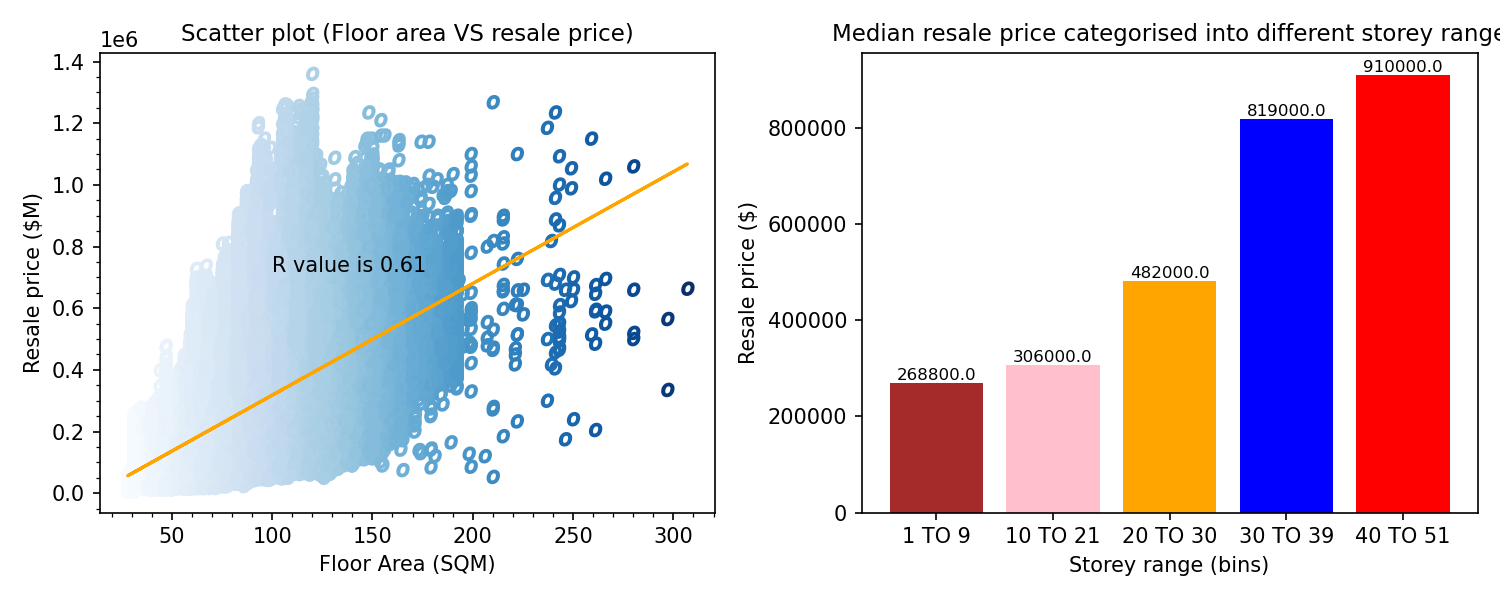

Correlation of: 0.6078880313365461


In [38]:
fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(10,4))

# Labels for ax3
ax3.set_xlabel('Floor Area (SQM)')
ax3.set_ylabel('Resale price ($M)')
ax4.set_xlabel('Storey range (bins)')
ax4.set_ylabel('Resale price ($)')

# Titles for graphs
ax3.set_title('Scatter plot (Floor area VS resale price)', size =11)
ax4.set_title('Median resale price categorised into different storey range', size=11)

# set color based on floor area
area = _1990to2021["Floor_area"]
cmap = cm.ScalarMappable(col.Normalize(min(area),max(area)), "Blues" )


ax3.scatter(_1990to2021['Floor_area'], _1990to2021['Resale_price'], marker='$o$' ,  color = cmap.to_rgba(area) )
m,b = np.polyfit(_1990to2021['Floor_area'],_1990to2021['Resale_price'],1)


ax3.plot(_1990to2021['Floor_area'], b + m * _1990to2021['Floor_area'], '-', color = 'orange')
correlation = np.corrcoef(np.array(_1990to2021['Floor_area'])
         ,np.array(_1990to2021["Resale_price"].data))

ax3.annotate(f"R value is {np.min(correlation):.2f}" , (100, m*100 + b + 400000 ), c = "k"   
             )

print(f"Correlation of: {np.min(correlation)}")


# find the differences of the range (e.g "1 TO 5" => 5)
differences = np.vectorize(lambda x : int(x[-2:]) - int(x[:2]) + 1)(_1990to2021['storey_range'].data) 
# Append new column into _1990to2021
newarr = append_fields(_1990to2021, "Storey bin size",differences)

binsize3 = newarr[newarr['Storey bin size'] == 3]


# Re-assign bins base on difference in range
def assign_bins(bins):
    bins = bins.split(" TO ")
    second = int(bins[1])
    if (second <= 9):
        return "1 TO 9"
    elif second <= 21:
        return "10 TO 21"
    elif second <= 30:
        return "20 TO 30"
    elif second <= 39:
        return "30 TO 39"
    elif second <= 51:
        return "40 TO 51"
    
newbins = np.vectorize(assign_bins)(binsize3['storey_range'].data)

updatedArr = append_fields(binsize3, "New bin y",newbins)


unique_bins = np.unique(updatedArr['New bin y'])
# Find prices per range
prices = np.array([np.ma.median(updatedArr['Resale_price'][updatedArr['New bin y'] == i])  for i in unique_bins])

bar2=ax4.bar(unique_bins,prices, color =['brown','pink', 'orange', 'blue','red'],picker = True)

plt.tight_layout()

ax3.minorticks_on()
ax4.bar_label(bar2, prices, fontsize = 8)



# bar graph of price categorised into unique stories.

plt.show()

In [39]:
np.unique(updatedArr['New bin y'])

masked_array(data=['1 TO 9', '10 TO 21', '20 TO 30', '30 TO 39',
                   '40 TO 51'],
             mask=[False, False, False, False, False],
       fill_value='N/A',
            dtype='<U8')

We can see the floor area (SQM) and resale price has a moderate positive correlation, with an R value of 0.61. This is not surprising and one would expect that as the floor area increase, the price would likewise do so. However, there are likely to be other more major factors that affect the resale price of hdb flats as well, such as distance to CBD, etc. Next, We can see that as the storey level increases, the price will similarly increase as well. The median resale price for hdb flats from storey 1-9 is SGD268800, while the median resale price for hdb flats from storey 40 to 50 is SGD910000. We can see that as the storey range increases, the resale price increases. This may be because higher floors may provide a more peaceful surrounding, e.g less traffic noise, panoramic views.

<h3>Some insights to the scatter plot</h3>

In [19]:
def outlierDetector(x, column):
    Q1 = np.percentile(x[column], 25)#
    Q3 = np.percentile(x[column],75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    outlier1 = x[x[column]> Upper_Fence]
    outlier2 = x[x[column] < Lower_Fence]
    return outlier1, outlier2, Lower_Fence, Upper_Fence
outlier1, outlier2, lowerFence, uppFence = outlierDetector(_1990to2021, 'Floor_area')


print(f"Floor area Outliers are detected by the upper and lower fences. Lower fence: {lowerFence}SQM, Upper fence: {uppFence}SQM")
print()
string =""
for i in np.unique(outlier1['flat_model']):
    string += i +'\n'
 
print(f'Anything beyond the fences are considered outliers. In this case, flat models such as\n\n{string}are among the outliers.')
print()
print(f"This is not considered surprising as most of them require large land space. e.g. terraces")

string2 = ""
for b in np.unique(outlier1['Town']):
    string2 += b+ '\n'
print(f'Towns such as\n\n{string2}are also included in the outliers, Ang mo kio/pasir ris/ kallang/whampoa are some areas with large HDBs. ')
# https://stackedhomes.com/editorial/biggest-5-room-hdb-in-all-26-estates/#gs.kiug8p



Floor area Outliers are detected by the upper and lower fences. Lower fence: 13.0SQM, Upper fence: 173.0SQM

Anything beyond the fences are considered outliers. In this case, flat models such as

Adjoined flat
Apartment
Maisonette
Multi Generation
Premium Maisonette
Terrace
are among the outliers.

This is not considered surprising as most of them require large land space. e.g. terraces
Towns such as

ANG MO KIO
BEDOK
BISHAN
CHOA CHU KANG
HOUGANG
JURONG WEST
KALLANG/WHAMPOA
PASIR RIS
QUEENSTOWN
TAMPINES
WOODLANDS
YISHUN
are also included in the outliers, Ang mo kio/pasir ris/ kallang/whampoa are some areas with large HDBs. 


Moreover, the majority of HDB flats are concentrated around 50-175 SQM.

<IPython.core.display.Javascript object>


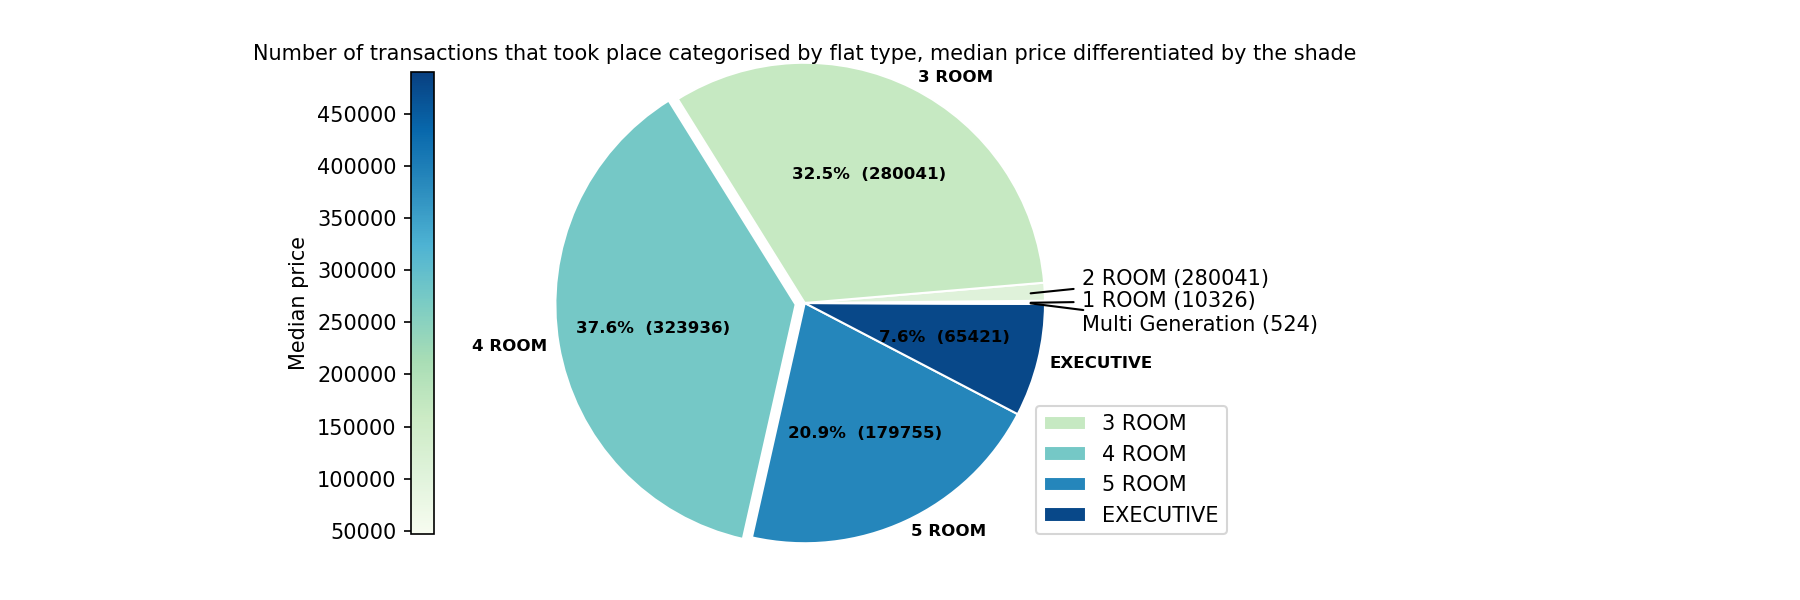

Resale price is differentiated by the shade of color in pie chart (darker = higher median)


In [20]:

fig3,ax5 = plt.subplots(figsize = (12,4))

# Aggregation to measure median per unique flat type
def aggregation(array, measure):
    flatTypeMedian = []
    for d in np.unique(array):
        flatTypeMedian.append(np.median(_1990to2021[array == d][measure]))
    return np.array(flatTypeMedian)

# Color shade to help discern price difference
colorShade = aggregation(_1990to2021['Flat_type'], "Resale_price")

# Count of trasactions that took place per flat type
def countPerCategory(array):
    countList = []
    for p in np.unique(array):
        countList.append(len(_1990to2021[_1990to2021['Flat_type'] == p]))
    return countList


slices = countPerCategory(_1990to2021['Flat_type'])


# implement a series of colors of different shades
cmap = cm.ScalarMappable(col.Normalize(min(colorShade),max(colorShade)), "GnBu" )

# Labels for pie chart
labels =['', '', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE','']


# Function for 
def percent(values):
    def my_autopct(pct):
        if pct < 5:
            return ""
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v})'.format(p=pct,v=val)
    return my_autopct
ax5.set_title("Number of transactions that took place categorised by flat type, median price differentiated by the shade", fontsize = 10, loc= 'center')


# Plot pie chart
wedges=ax5.pie(slices, colors = cmap.to_rgba(colorShade),
                               labels=labels, labeldistance=1.05, 
                               autopct=percent(slices), 
                               textprops={'fontsize': 8, 'fontweight':'bold'},
                              wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                              radius=1.3, explode = (0,0,0,0.05,0,0,0))



# Arrow annotation
# To label pie chart with respective transaction values.
arr = ["Multi Generation ({})".format(slices[-1]), "1 ROOM ({})".format(slices[1]), "2 ROOM ({})".format(slices[2])]

# Labels
coords = [(1.5, -0.15), (1.5, -0.02), (1.5, 0.1)] #Coordinates for the text
arrowCoords=[(1.2,0.0006), (1.2, 0.001), (1.2,0.05)] #coordinates to point the arrow
for x,z in enumerate(arr):
    ax5.annotate(z, xy=arrowCoords[x] , xytext =coords[x] , xycoords='data', arrowprops=dict(arrowstyle="-"))

# Color bar to see the median shade.
cbar = plt.colorbar(cmap , location = "left")   
cbar.ax.set_ylabel('Median price', rotation=90)
    
print("Resale price is differentiated by the shade of color in pie chart (darker = higher median)")

# Legend for clarity
ax5.legend(loc=(1,0))

plt.show()


<h5>Transactions measured by number of sales for that flat type (rows)</h5>
4 Room flats seems to be the most popular among the flat types, with 323936 (37.6%) transactions, while multi generation seems to be have the least transactions of 524. The shade of each pie piece is differentiated by median price, with the most expensive being executive flats, while cheapest being multi generation/1 room flats.

In [21]:
# NUMPY info
userTown = input('Enter Town you wish to stay: ');userTown=userTown.upper();
userRoom = input('Enter number of rooms/ flat type in caps: ')
userPrice = float(input("Enter your budget: "))
if userRoom.isnumeric() == True:
    userRoom+= " ROOM"

# Index based on user's input
index3 = _1990to2021[(_1990to2021['Town'] == userTown) & (_1990to2021['Flat_type'] ==userRoom) & (_1990to2021['Resale_price'] < userPrice)]

strg = ''
for v,i in enumerate(np.unique(index3['Block'])):
    strg += 'Block ' + i+ '\t' + str(index3['Street_name'][v]) + "\tYear of sale: "+ str(index3['Month'][v]) +'\n'

    
print(f'Based on previous years resale prices, you can consider your new HDB with your specifications at these areas:\n{strg}')


Enter Town you wish to stay: kallang/whampoa
Enter number of rooms/ flat type in caps: 2
Enter your budget: 1000000
Based on previous years resale prices, you can consider your new HDB with your specifications at these areas:
Block 1	JLN BATU	Year of sale: 1990-01
Block 10	JLN BATU	Year of sale: 1990-02
Block 11	JLN BATU	Year of sale: 1990-02
Block 3	JLN BATU	Year of sale: 1990-02
Block 6	JLN BATU	Year of sale: 1990-03
Block 7	JLN BATU	Year of sale: 1990-05
Block 8	JLN BATU	Year of sale: 1990-05
Block 805	JLN BATU	Year of sale: 1990-07
Block 9	JLN BATU	Year of sale: 1990-07



<h3>B. Comparing rent</h3>

<h3>1. Loading data<h3>

In [22]:
medianRent =np.genfromtxt('./medianrent.csv', delimiter = ',',missing_values=['na'],
                          dtype = [('quarter', 'U7'), ('town', '<U15'),('flat_type', 'U16'), ('median_rent', 'int32')],
                         skip_header = 1, usecols=np.arange(0,4))
# Set median rent col to int, 'na' or '-' values are converted to -1.

<h3>2. Cleansing of dataset</h3>

<i>Cells with -1(null values) values have either no rental transactions for that quarter/ or too little transactions</i>
<i>np.delete is used to remove rows under medianRent['median_rent'] with -1 as the rows as the most important factor would be the median rent price.</i>

In [23]:
medianRent = np.delete(medianRent,np.where(medianRent['median_rent'] == -1))
# Removing rows with -1 values in 'median rent' column, as  the rows would no longer be relevant for analysis.

In [24]:
# Changing the quarter to YYYY-MM format where the MM is the middle of quarter.
def changeDate(element):
    year, quarter = element.split('-')
    year = int(year)
    if quarter == 'Q1':
        quarter = '02'
    elif quarter == 'Q2':
        quarter = '05'
    elif quarter == 'Q3':
        quarter = '08'
    elif quarter == 'Q4':
        quarter = '11'
    return np.datetime64(f'{year}-{quarter}')
    

medianRent['quarter'] = np.array(list(map(changeDate,medianRent['quarter'])))

def changeForm(element):
    if element == '2-RM':
        return '2 ROOM'
    elif element == '3-RM':
        return '3 ROOM'
    elif element == '4-RM':
        return '4 ROOM'
    elif element == '5-RM':
        return '5 ROOM'
    elif element == 'EXEC':
        return 'EXECUTIVE'
    else:
        return element

medianRent['flat_type'] = np.array(list(map(changeForm,medianRent['flat_type'])))

Changing the quarters to the middle of each quarter...

In [25]:
# Changing column names.
medianRent.dtype.names = 'date', 'town','flat_type', 'Median_rent'

In [26]:
# Appending one new column 'year'
year2 = np.vectorize(lambda x : int(x[:4]))(medianRent["date"].data)  
medianRent = append_fields(medianRent, 'Year', np.array(year2), dtypes = 'int').data

Inserting a new column "Year"

<h3>3. Dataset/array info</h3>

In [27]:
medianRent

array([('2005-05', 'ANG MO KIO', '3 ROOM',  800, 2005),
       ('2005-05', 'ANG MO KIO', '4 ROOM',  950, 2005),
       ('2005-05', 'BEDOK', '3 ROOM',  800, 2005), ...,
       ('2021-02', 'YISHUN', '4 ROOM', 1900, 2021),
       ('2021-02', 'YISHUN', '5 ROOM', 2100, 2021),
       ('2021-02', 'YISHUN', 'EXECUTIVE', 2250, 2021)],
      dtype=[('date', '<U7'), ('town', '<U15'), ('flat_type', '<U16'), ('Median_rent', '<i4'), ('Year', '<i4')])

The median rent indicates that half the total number of units were rented above that price while half were below.

In [35]:
col_count2 = len(medianRent[:][0])
row_count2 = len(medianRent[:])
typedata =medianRent.dtype
print("Title: Median Rent by Town and Flat Type")
print("Frequency of data is quarterly.")
print()
print(f"In this array, there are {row_count2} rows and {col_count2} columns.")
print("Below is the respective column names and its corresponding data type.\n")

for v,i in enumerate(medianRent.dtype.names):
    if 'int' in str(typedata[v]) or 'float' in str(typedata[v]):
        print(str(v+1)+".",i,"\t - ",typedata[v], '(numeric)')
    else:
        print(str(v+1)+".",i,"\t - ",typedata[v])
    
print("The main types of data are Text, unicode (Not numerical), and numeric (int)")

Title: Median Rent by Town and Flat Type
Frequency of data is quarterly.

In this array, there are 4664 rows and 5 columns.
Below is the respective column names and its corresponding data type.

1. date 	 -  <U7
2. town 	 -  <U15
3. flat_type 	 -  <U16
4. Median_rent 	 -  int32 (numeric)
5. Year 	 -  int32 (numeric)
The main types of data are Text, unicode (Not numerical), and numeric (int)


<h3>4. Graphs</h3>

In [29]:
def getArrbyflatType(arr, category, rent, year):
    dicts = {}
    unique_flat = np.unique(arr[category])
    unique_years =np.unique(arr[year])
    for i in unique_years:
        data = np.array([np.mean(arr[(arr[year] == i) & (arr[category] == y)][rent]) for y in unique_flat])
        dicts[i] = data
    return dicts
dictsOfyears = getArrbyflatType(medianRent, 'Year', 'Median_rent', 'flat_type')
# Calculate mean of median rent for each room -> store in a dictionary
print(dictsOfyears)


{'2 ROOM': array([          nan,           nan,           nan, 1050.        ,
                 nan, 1266.66666667, 1246.66666667, 1300.        ,
       1500.        , 1632.5       , 1593.33333333, 1536.        ,
       1508.57142857, 1461.42857143, 1475.        , 1493.33333333,
       1600.        ]), '3 ROOM': array([ 803.74418605,  840.84482759, 1076.38356164, 1463.86666667,
       1464.86111111, 1559.74683544, 1788.53658537, 1968.48101266,
       2064.5       , 2040.38461538, 1962.        , 1856.41975309,
       1767.65432099, 1728.7654321 , 1731.05882353, 1763.29113924,
       1815.71428571]), '4 ROOM': array([ 941.9       ,  987.203125  , 1318.45679012, 1778.53932584,
       1741.41304348, 1918.26530612, 2183.63636364, 2374.53608247,
       2488.86597938, 2452.24489796, 2359.9       , 2263.        ,
       2142.        , 2073.1       , 2080.2       , 2098.95833333,
       2161.2       ]), '5 ROOM': array([ 979.22222222, 1055.625     , 1469.62686567, 1971.73913043,
       1855.0724

<h3>This graph below aims to compare rent/ resale HDB prices, and determines which would be a more suitable option based on personal choices. View individually/ together</h3>

Please click on line for interactivity/values. Months can be set to represent the rental period

The partial line for 2 room means that there was no rental transaction/ insignificant

<IPython.core.display.Javascript object>


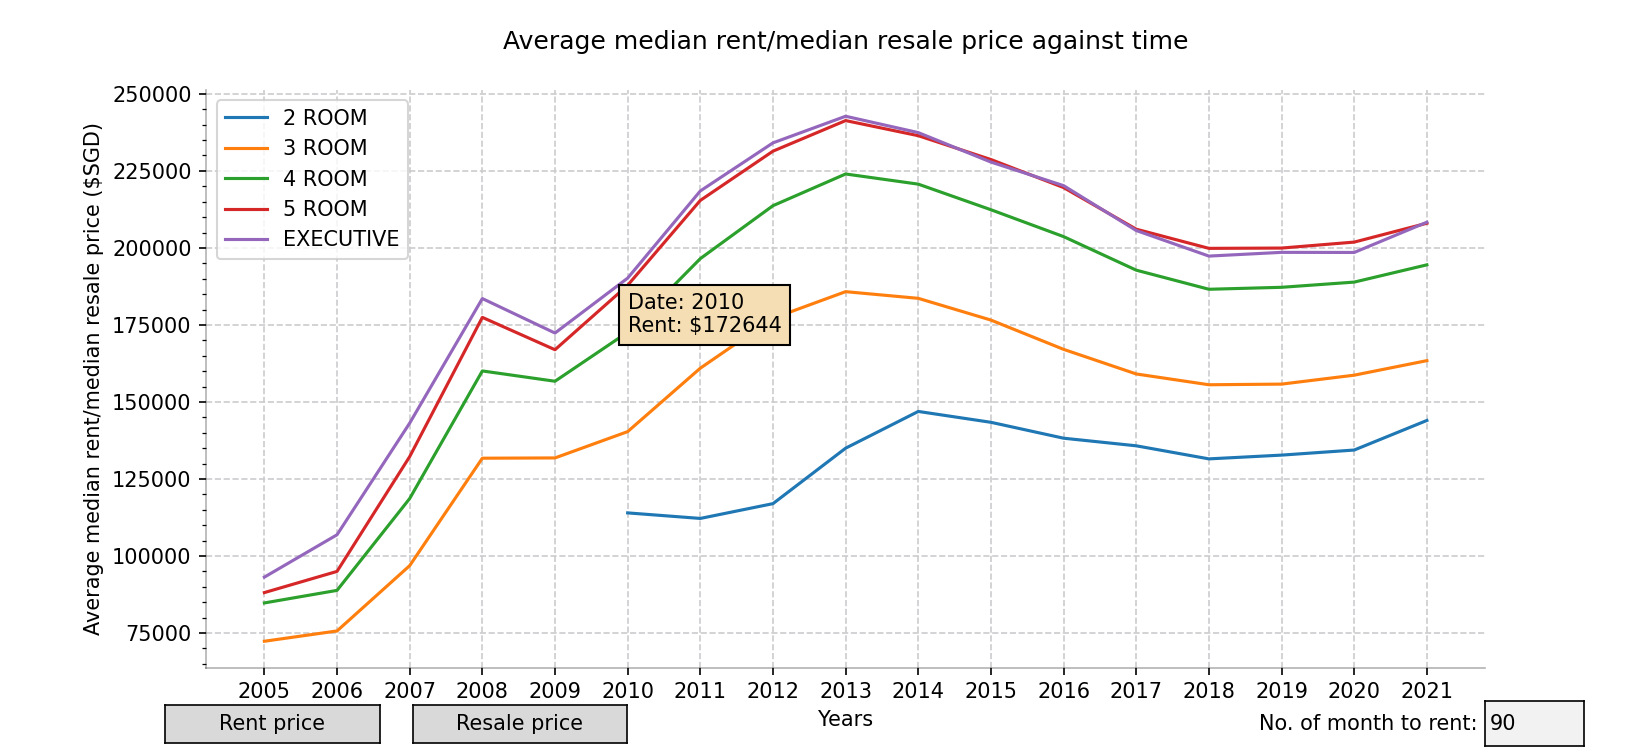

In [30]:
fig12,ax12 = plt.subplots(figsize = (11,5))



years = np.unique(medianRent['Year'])
textz = ax12.text(ax12.get_xlim()[0], 0, "", bbox=dict(facecolor='wheat', pad=4))


def showPrice(event): 
    thisline = event.artist
    mouseevent = event.mouseevent
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    textz.set_position((xdata[ind][0],ydata[ind][0]))
    textz.set_text("Date: " +str(round(xdata[ind][0])) +"\nRent: $" +str(round(ydata[ind][0])) )
    fig12.canvas.draw()
    

def plotForResale(arr1,arr2):
    dicts = {}
    yearFormat = arr2['Year']
    yearFormat2 = arr1['Month'].astype('datetime64[Y]').astype(int) +1970
    unique_flat = np.unique(arr2['flat_type'])
    unique_years =np.unique(yearFormat)
    for i in unique_flat:
        data = np.array([np.median(arr1[(arr1['Flat_type']== i) & (yearFormat2 == y)]['Resale_price']) for y in unique_years])
        dicts[i] = data
    return dicts
resalePlot = plotForResale(_1990to2021, medianRent )


def plot(mth=1, dictz= dictsOfyears):
    for key,value in dictz.items():
        ax12.plot(years, value * mth,label = key , picker = True)
    ax12.grid(which='major', color='#CCCCCE', linestyle='--')
    ax12.legend(loc='best')
    ax12.yaxis.get_ticklocs(minor=True)
    ax12.minorticks_on()
    ax12.xaxis.set_tick_params(which='minor', bottom=False)
    ax12.set_xlabel('Years')
    ax12.set_ylabel('Average median rent/median resale price ($SGD)')
    ax12.set_title('Average median rent/median resale price against time',y=1.05)
    plt.gca().spines["top"].set_alpha(.3)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.3)
    plt.gca().spines["left"].set_alpha(.3) 
    ax12.spines['top'].set_visible(False)
    ax12.spines['right'].set_visible(False)
    ax12.set_xticks(np.arange(2005, 2022))
    global textz
    textz = ax12.text(ax12.get_xlim()[0], 0, "", bbox=dict(facecolor='wheat', pad=4.0), color = 'k')


plot(mth=1, dictz =dictsOfyears)


def changeYr(mth):
    mth = int(mth)
    ax12.clear()
    plot(mth, dictsOfyears)
    


class Index(object): 
    def resale(self, event):
        ax12.clear()
        ubox.ax.patch.set_visible(False)
        ubox.label.set_visible(False)
        ubox.text_disp.set_visible(False)
        ubox.ax.axis('off')
        plot(mth =1,dictz =resalePlot)
        showPrice(globalevent)
        plt.draw()
  
    def rent(self, event):
        ax12.clear()
#         Plotting of graphs
        plot(1,  dictz =dictsOfyears)
        plt.draw()
        ubox.ax.patch.set_visible(True)
        ubox.label.set_visible(True)
        ubox.text_disp.set_visible(True)
        ubox.ax.axis('on')
        showPrice(globalevent)

# Interactivity buttons settings
callback = Index()
btn = plt.axes([0.25, 0.01, 0.13, 0.05])
bttn = Button(btn, 'Resale price')
bttn.on_clicked(callback.resale)


axrent = plt.axes([0.1, 0.01, 0.13, 0.05])
btn2 = Button(axrent, 'Rent price')
btn2.on_clicked(callback.rent)

user = plt.axes([0.9, 0.005, 0.06, 0.06])
ubox = TextBox(user, 'No. of month to rent: ', initial="1")

ubox.on_submit(changeYr)

 
# Text display
fig12.canvas.mpl_connect('pick_event', showPrice)



plt.show()

This line graph allows the comparison of rental prices vs resale prices, of which would be a more suitable tenure type. This comparison would be useful for calculating how much one would save/overspend if one of the option is chosen. Apart from this however, there are indeed other factors that would affect decisions of whether to rent/buy. e.g Long term/short term, privacy if tenant were to live in same household as owner.

<h3>Comparing between resale/rent price side by side below</h3>

<h4>Months can be set to represent the rental period</h4>

<IPython.core.display.Javascript object>


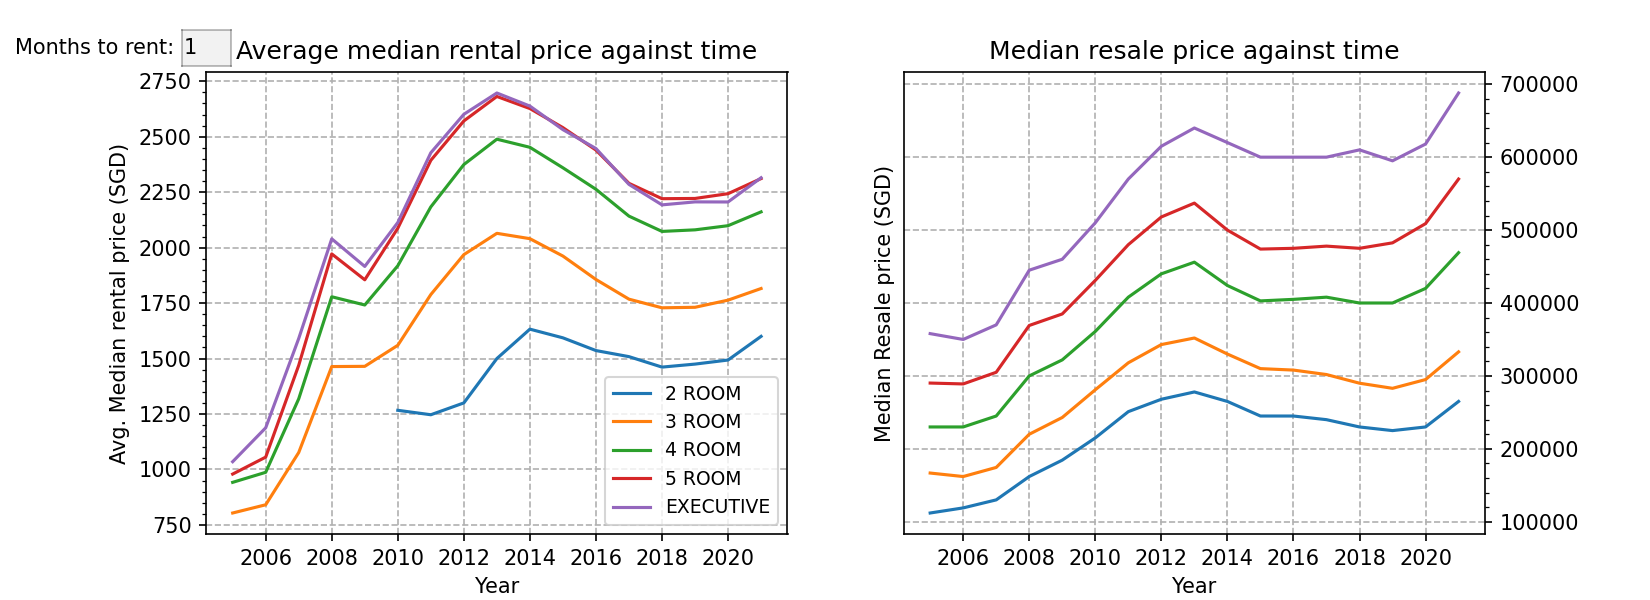

In [31]:
fig13, (ax13,ax14) = plt.subplots(1,2, figsize=(11,4))
# Plot side by side
def sidebyside(mth=1):
    for key,value in dictsOfyears.items():
        ax13.plot(years, value * mth,label = key , picker = True)
    for key1,value1 in resalePlot.items():
        ax14.plot(years, value1,label = key1 , picker = True)
    ax14.yaxis.tick_right()
    ax13.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax14.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax13.set_ylabel('Avg. Median rental price (SGD)')
    ax14.set_ylabel('Median Resale price (SGD)')
    ax13.set_xlabel('Year')
    ax14.set_xlabel('Year')
    ax13.grid(which='major', linestyle = '--')
    ax14.grid(which='major', linestyle = '--')
    ax13.legend(loc='lower right', prop={'size': 9})
    ax13.title.set_text('Average median rental price against time')
    ax14.title.set_text('Median resale price against time')
sidebyside()

def changeyr(mth):
    mth = int(mth)
    ax13.clear()
    sidebyside(mth)
    
inputs = plt.axes([0.11, 0.89, 0.03, 0.06])
ubox1 = TextBox(inputs, 'Months to rent: ', initial="1")
ubox1.on_submit(changeyr)




plt.show()

In [32]:
highestdev = 1
t0wn = ""
for town in np.unique(medianRent['town']):
    stdev = medianRent[medianRent['town'] == town]['Median_rent']
    print(f"Standard deviation for median rent for {town} flats is: {np.std(stdev):.2f}")
    if float(np.std(stdev)) > highestdev:
        highestdev = np.std(stdev)
        t0wn = town
print()
print(t0wn, ":", round(highestdev,1), sep ="\t")

Standard deviation for median rent for ANG MO KIO flats is: 507.36
Standard deviation for median rent for BEDOK flats is: 510.54
Standard deviation for median rent for BISHAN flats is: 493.38
Standard deviation for median rent for BUKIT BATOK flats is: 470.54
Standard deviation for median rent for BUKIT MERAH flats is: 617.13
Standard deviation for median rent for BUKIT PANJANG flats is: 264.73
Standard deviation for median rent for BUKIT TIMAH flats is: 498.89
Standard deviation for median rent for CENTRAL flats is: 478.00
Standard deviation for median rent for CHOA CHU KANG flats is: 405.78
Standard deviation for median rent for CLEMENTI flats is: 565.23
Standard deviation for median rent for GEYLANG flats is: 551.59
Standard deviation for median rent for HOUGANG flats is: 474.74
Standard deviation for median rent for JURONG EAST flats is: 490.31
Standard deviation for median rent for JURONG WEST flats is: 520.80
Standard deviation for median rent for KALLANG/WHAMPOA flats is: 550.05

We can see that median rent price for Queenstown has the highest standard deviation than the other towns SGD656.1, which means the median rental prices are less consistent, whereas the punggol has the lowest standard deviation for median rent of SGD251.5. The disparity of standard deviations can be attributed to other factors such as flat type in the area. e.g Queenstown has more expensive HDB flats (executive flats) which affect the standard deviation.